# Wasserstein interpolation of real worm images

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

from utils import wasserstein_interp_2d

In [3]:
# Path to file containing frames
IN_FPATH = '/Users/cmcgrory/paninski_lab/worm/data/hillman_3.h5'

# Section of XY plane where head is found
HEAD_X = (255, 370)
HEAD_Y = (115, 190)

# Data interval to use (inclusive)
T_START, T_END = 0, 5

# Regularization parameter
REG = 0.0005

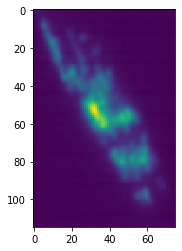

In [4]:
# Load set of frames from file
with h5py.File(IN_FPATH, 'r') as f:
    data_raw = np.array(f.get('red'))
    
# Take slice of data we want to use
data_slice = data_raw[HEAD_X[0]:HEAD_X[1], HEAD_Y[0]:HEAD_Y[1], :, T_START:(T_END+1)]

# Take sum projection -- this preserves mass
data_proj = np.sum(data_slice, 2)

# Normalize data
z = np.sum(np.sum(data_proj, 0), 0)
frames = data_proj / z

# Plot first frame from dataset
plt.imshow(frames[:, :, 0])

In [ ]:
f_start = frames[:, :, T_START]
f_end = frames[:, :, T_END]

nt = T_END - T_START + 1
alpha_vals = np.linspace(0, 1, nt)

f_interp = [wasserstein_interp_2d(f_start, f_end, REG, a) for a in alpha_vals]
frames_interp = np.rollaxis(np.array(f_interp), 0, -1)